# 三角板目标检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 进入主目录

In [2]:
# windows的jupyter notebook主目录默认在E:/
import os
os.chdir('mmpose')

## 导入工具包

In [3]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [4]:
# 日志文件路径
log_path = 'E:\\mmpose\\mmpose\\work_dirs\\faster_r_cnn_triangle\\20231002_222401\\vis_data\\scalars.json'

In [5]:
# 其中每一行是当前batchsize训练后输出的日志信息，在命令行中训练时经常看到
with open(log_path, "r") as f:
    json_list = f.readlines()

In [6]:
len(json_list)

1722

In [63]:
eval(json_list[4])

{'lr': 0.00018016032064128258,
 'data_time': 0.7008933544158935,
 'loss': 1.2759040355682374,
 'loss_rpn_cls': 0.6970854878425599,
 'loss_rpn_bbox': 0.019772793166339397,
 'loss_cls': 0.5541812062263489,
 'acc': 99.4140625,
 'loss_bbox': 0.0048645272734574975,
 'time': 1.313089942932129,
 'epoch': 1,
 'memory': 1900,
 'step': 5}

In [8]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|████████████████████████████████████████████████████████████████████████████| 1722/1722 [00:00<00:00, 2809.82it/s]


In [9]:
df_train

,lr,data_time,loss,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,time,epoch,memory,step
0,0.00002,3.486349,1.406602,0.695887,0.007037,0.680643,53.125000,0.023036,5.354057,1.0,1588.0,1.0
1,0.00006,1.745169,1.384848,0.697003,0.016808,0.659409,71.484375,0.011628,2.830374,1.0,1900.0,2.0
2,0.00010,1.165601,1.349135,0.697467,0.020229,0.623526,85.742188,0.007914,1.990434,1.0,1900.0,3.0
3,0.00014,0.875370,1.332321,0.696599,0.018327,0.611419,79.101562,0.005976,1.564272,1.0,1747.0,4.0
4,0.00018,0.700893,1.275904,0.697085,0.019773,0.554181,99.414062,0.004865,1.313090,1.0,1900.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1715,0.00200,0.013204,0.105759,0.004514,0.011359,0.031705,97.656250,0.058181,0.320711,10.0,1746.0,1716.0
1716,0.00200,0.013158,0.106544,0.004722,0.011375,0.032050,98.632812,0.058396,0.320096,10.0,1746.0,1717.0
1717,0.00200,0.013226,0.103503,0.004660,0.010456,0.031374,99.023438,0.057013,0.319529,10.0,1746.0,1718.0
1718,0.00200,0.013149,0.102569,0.004831,0.010477,0.031361,96.484375,0.055900,0.319398,10.0,1900.0,1719.0


In [10]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_s,coco/bbox_mAP_m,coco/bbox_mAP_l,pascal_voc/mAP,pascal_voc/AP50,data_time,time,step
0,0.536,0.930,0.586,-1.0,-1.0,0.536,0.892620,0.893,0.111151,0.236756,5.0
1,0.813,0.979,0.939,-1.0,-1.0,0.813,0.996714,0.997,0.003697,0.122285,10.0


## 导出训练日志表格

In [11]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [12]:
# windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [13]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [70]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


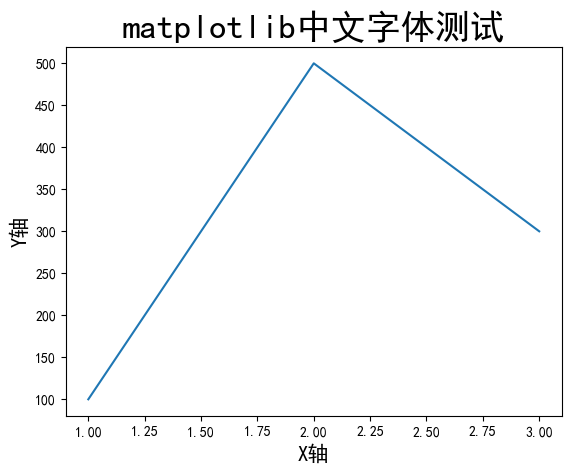

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [15]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [16]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_rpn_cls', 'loss_rpn_bbox', 'loss_cls',
       'acc', 'loss_bbox', 'time', 'epoch', 'memory', 'step'],
      dtype='object')

In [17]:
metrics = ['loss', 'loss_bbox', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_bbox']


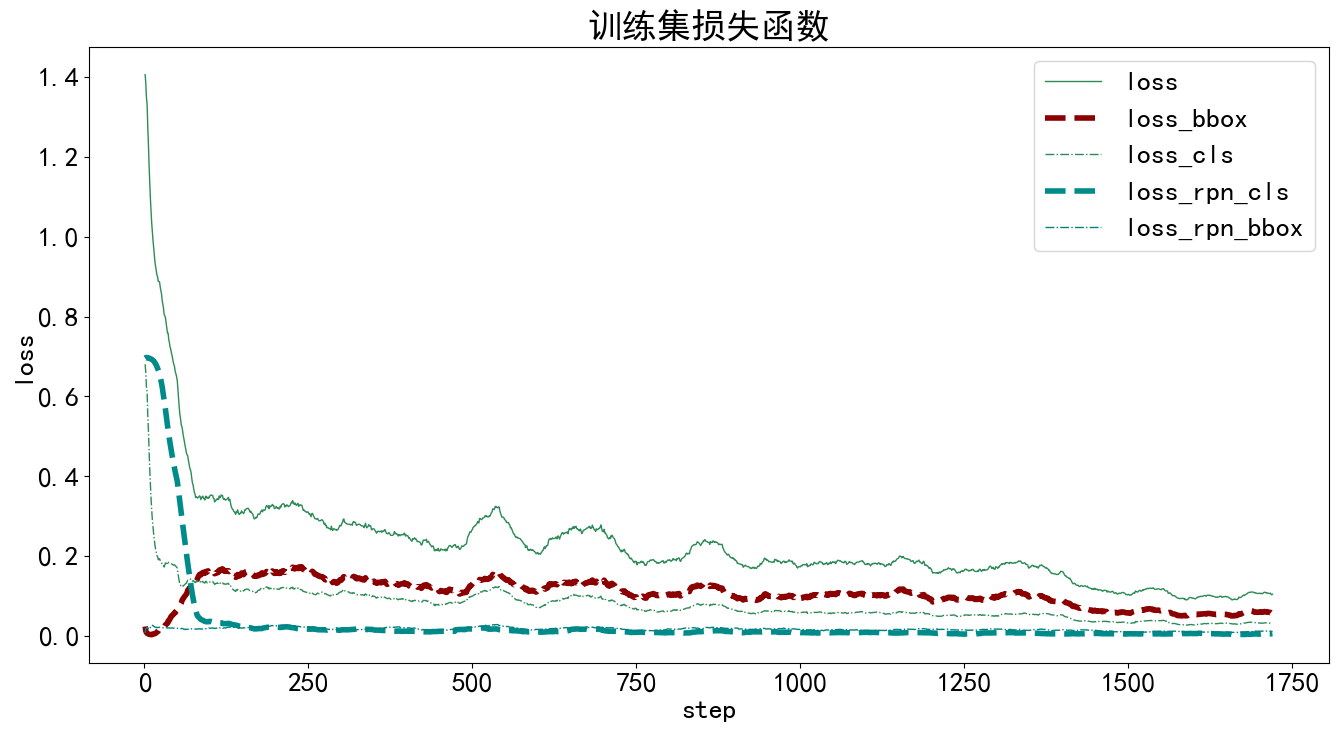

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [19]:
metrics = ['acc']

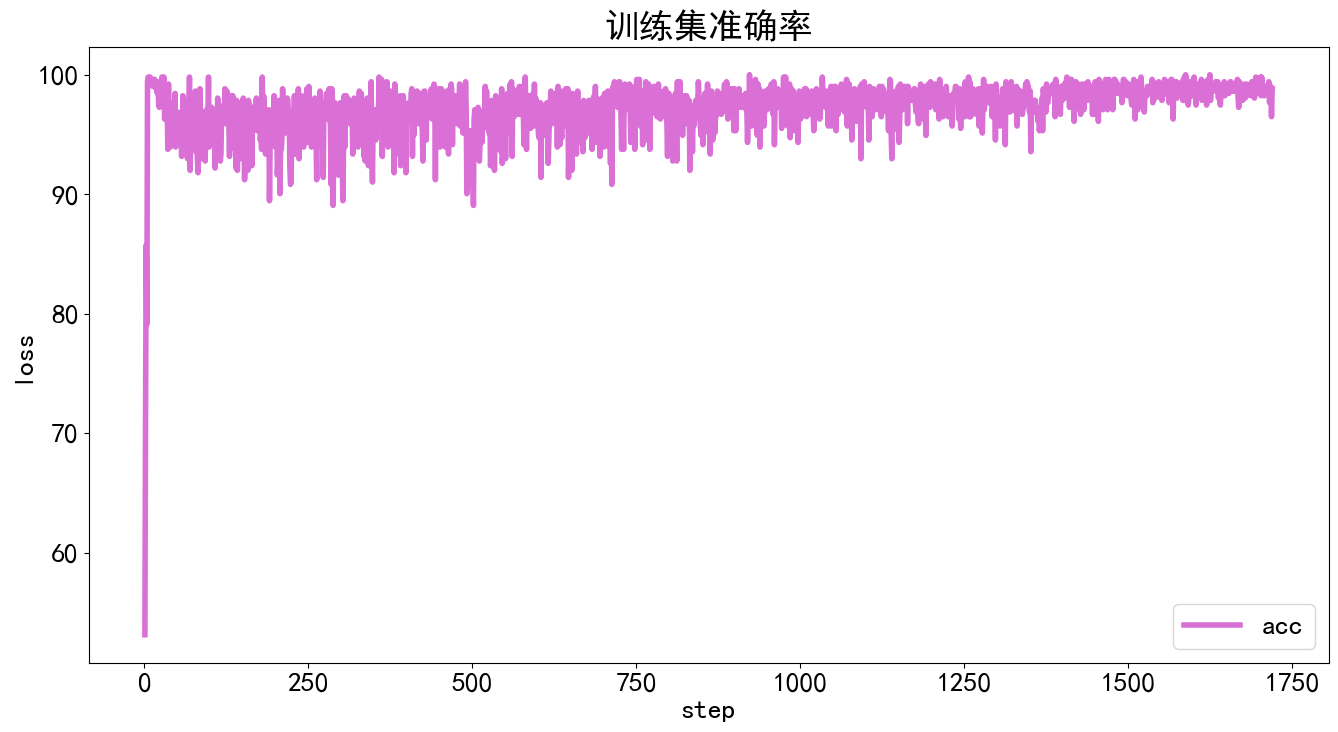

In [20]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l',
       'pascal_voc/mAP', 'pascal_voc/AP50', 'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

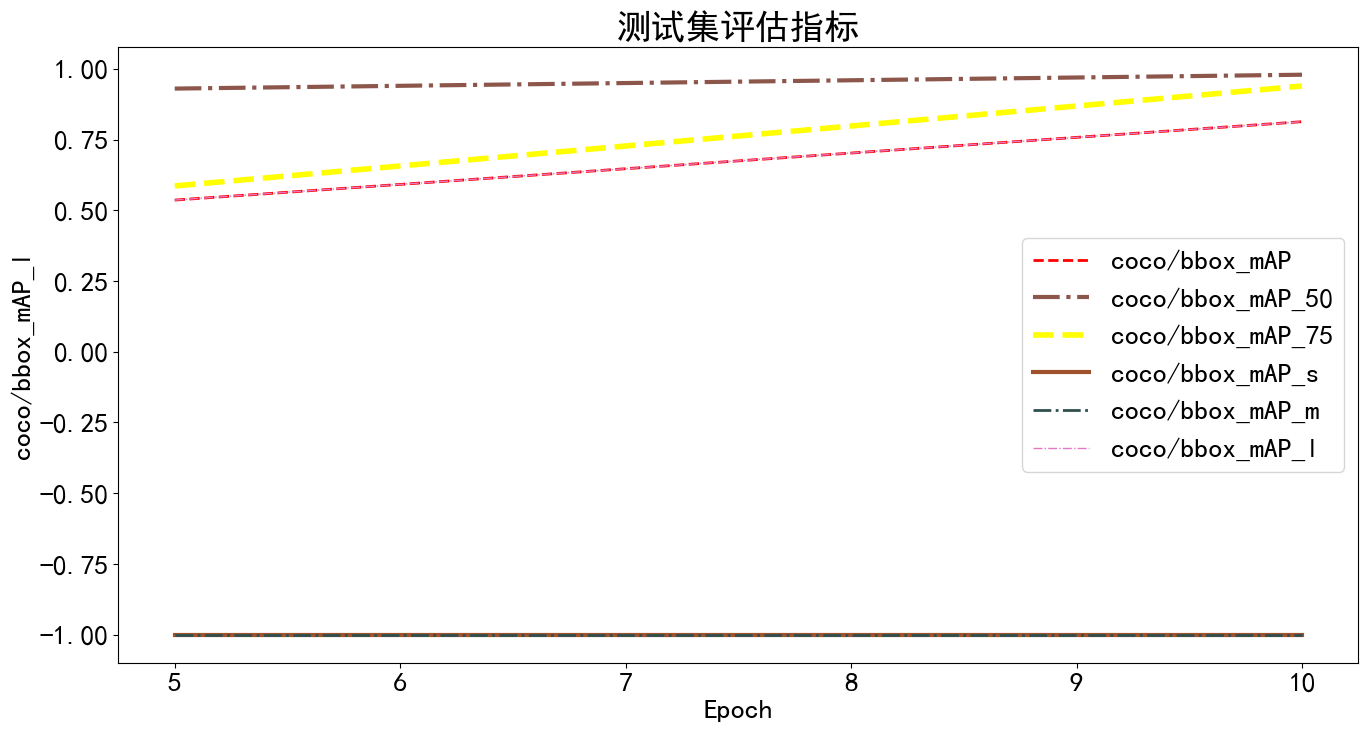

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-PASCAL VOC Metric

In [24]:
metrics = ['pascal_voc/mAP', 'pascal_voc/AP50']

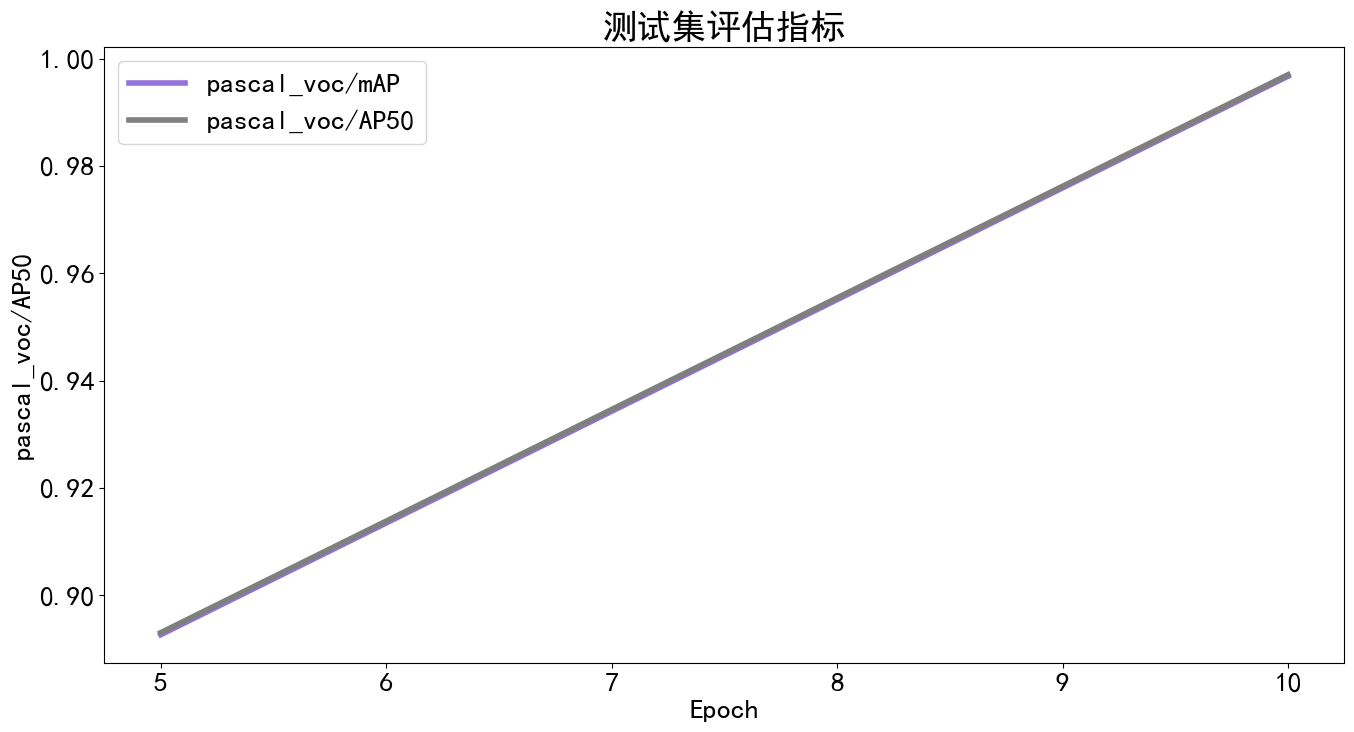

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()